# Analyse de données avec visualisation T-SNE et UMAP
Ce notebook implémente une analyse de données sur le jeu de données `Covertype`. Il inclut des techniques de réduction de dimension (T-SNE et UMAP) et une classification par forêt aléatoire.

In [1]:
# Importations nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import umap
#import umap.parametric_umap
from imblearn.under_sampling import RandomUnderSampler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres globaux pour les visualisations
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 100

C:\Users\soonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Chargement du dataset
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets

In [ ]:
# Échantillonnage pour réduire la taille et la complexité
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

In [4]:
# Split du dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

In [5]:
# Fonction de visualisation avec T-SNE
def visualize_tsne(X, y, title):
    tsne = TSNE(n_components=2, random_state=42, perplexity=100, max_iter=1500, learning_rate=600)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=np.ravel(y), palette='tab10', marker='o', s=30, alpha=0.7, edgecolor='k')
    plt.title(f'T-SNE Visualization - {title}')
    plt.legend(title='Classes', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

T-SNE visualization on original dataset


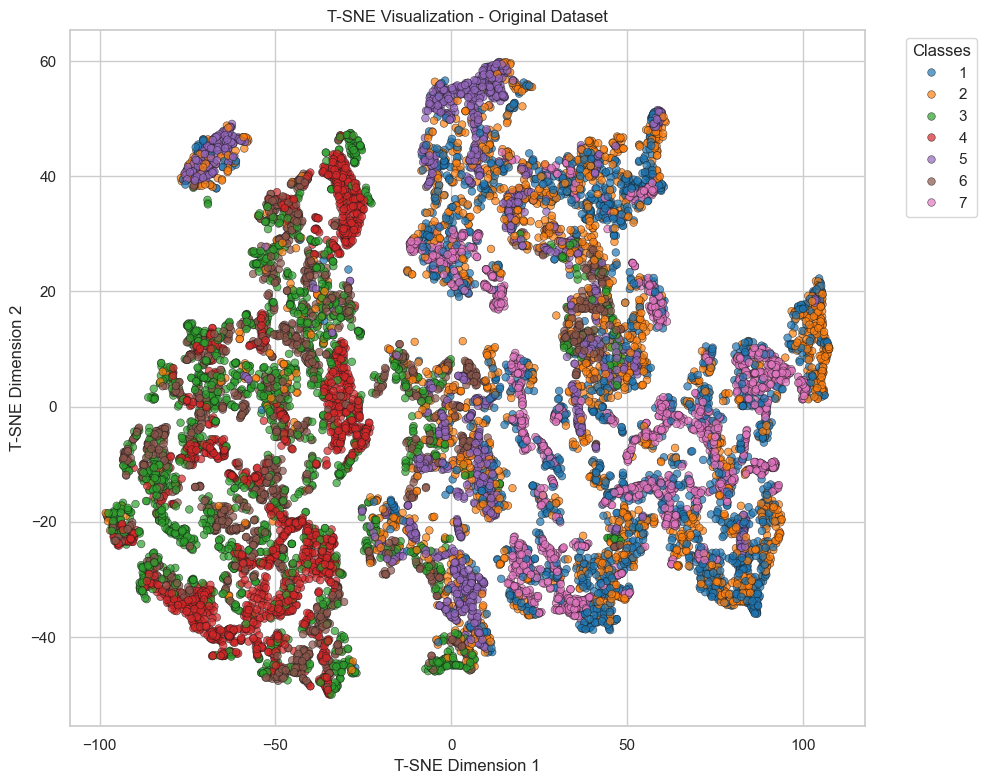

In [6]:
# Visualisation des classes avec T-SNE
print('T-SNE visualization on original dataset')
visualize_tsne(X_train, y_train, 'Original Dataset')

In [7]:
# Fonction de visualisation avec UMAP
def visualize_umap(X, y, title, parametric=False):
    if parametric:
        umap_model = umap.parametric_umap.ParametricUMAP(n_components=2, random_state=42, n_neighbors=50, min_dist=0.1)
    else:
        umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=50, min_dist=0.5)
    X_umap = umap_model.fit_transform(X)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=np.ravel(y), palette='tab10', marker='o')
    plt.title(f'UMAP Visualization - {title}')
    plt.show()

UMAP visualization on original dataset


C:\Users\soonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


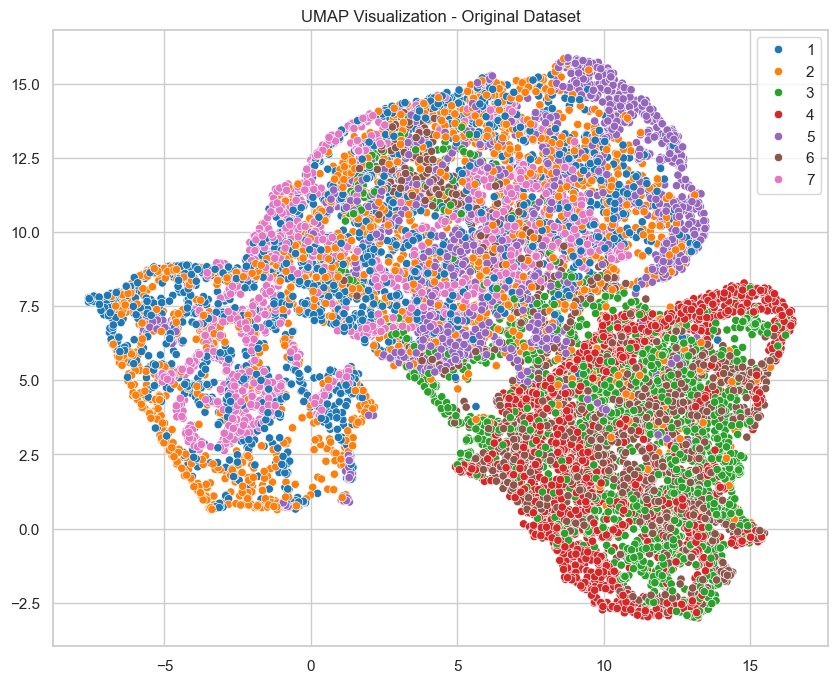

In [8]:
# Visualisation avec UMAP
print('UMAP visualization on original dataset')
visualize_umap(X_train, y_train, 'Original Dataset', parametric=False)

In [9]:
# Classification avec RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

C:\Users\soonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8634078696481192
F1 Score: 0.8618528564775945
